In [2]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Key Question : How does the demographic and the income level of the people affect the preference and acceptance of self-driving cars? 

### Preferences for self-driving cars by age, gender, education, and income levels
### Correlations between these variables

In [12]:
#Read raw file
drive_selfcar_df=pd.read_csv('https://raw.githubusercontent.com/EvaW01/schulich_ai_fundamentals/main/MMAI_Fundamental_Assignment.csv')

drive_selfcar_df.head()


,Unnamed: 0,Question_key,Interview_start_time,Interview_end_time,Device_Type,Language,Form_No,Tablet_category,Read_about_SelfDrive_Car,Widespread_use_SelfDrive_Car,...,People_Political_Party,People_Political_Type,People_Political_Type_Category,Income_Level,Vote_Registered_Adress,Ideology,Interaction_Frequency,Volume_Sum,Income_Class,Weight_99_Percent
0,0,100260.0,2021-11-03 14:25:27,2021-11-03 14:45:34,Laptop/PC,English,Form 2,Non-tablet HH,NaN,NaN,...,NaN,Rep/Lean Rep,Conservative Rep/Lean,"$50,000 to less than $60,000",You are ABSOLUTELY CERTAIN that you are regist...,Very conservative,Several times a day,No,Middle income,0.206396
1,1,100314.0,2021-11-04 12:35:35,2021-11-04 12:55:29,Smartphone,English,Form 1,Non-tablet HH,A little,Not sure,...,NaN,Rep/Lean Rep,Moderate/Liberal Rep/Lean,"$40,000 to less than $50,000",You are ABSOLUTELY CERTAIN that you are regist...,Liberal,Several times a day,Yes,Middle income,0.315090
2,2,100363.0,2021-11-03 20:23:43,2021-11-03 20:36:24,Smartphone,English,Form 1,Non-tablet HH,A little,Good idea for society,...,NaN,Dem/Lean Dem,Moderate/Conservative Dem/Lean,"$100,000 or more",You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Several times a day,No,Upper income,0.829579
3,3,100598.0,2021-11-02 13:01:05,2021-11-04 12:37:42,Laptop/PC,English,Form 2,Non-tablet HH,NaN,NaN,...,NaN,Rep/Lean Rep,Conservative Rep/Lean,"$100,000 or more",You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Several times a day,Yes,Upper income,0.337527
4,4,100637.0,2021-11-02 12:32:58,2021-11-02 12:46:23,Laptop/PC,English,Form 2,Non-tablet HH,NaN,NaN,...,The Republican Party,Rep/Lean Rep,Conservative Rep/Lean,"$30,000 to less than $40,000",You are ABSOLUTELY CERTAIN that you are regist...,Very conservative,Less often,No,Lower income,1.210606


In [13]:
#drive_selfcar_df['Income_Level'] = drive_selfcar_df['Income_Level'].apply(lambda x: '50000 - 60000' if x == '$50,000 to less than $60,000')

drive_selfcar_df['Income_Level'] = drive_selfcar_df['Income_Level'].apply(
    lambda x: '50000 - 60000' if str(x).lower() == '$50,000 to less than $60,000'.lower() else x)
drive_selfcar_df['Income_Level'] = drive_selfcar_df['Income_Level'].apply(
    lambda x: '40000 - 50000' if str(x).lower() == '$40,000 to less than $50,000'.lower() else x)
drive_selfcar_df['Income_Level'] = drive_selfcar_df['Income_Level'].apply(
    lambda x: '100000' if str(x).lower() == '$100,000 or more'.lower() else x)
drive_selfcar_df['Income_Level'] = drive_selfcar_df['Income_Level'].apply(
    lambda x: '30000 - 40000' if str(x).lower() == '$30,000 to less than $40,000'.lower() else x)
drive_selfcar_df['Income_Level'] = drive_selfcar_df['Income_Level'].apply(
    lambda x: '30000' if str(x).lower() == 'Less than $30,000'.lower() else x)
drive_selfcar_df['Income_Level'] = drive_selfcar_df['Income_Level'].apply(
    lambda x: '70000 - 80000' if str(x).lower() == '$70,000 to less than $80,000'.lower() else x)
drive_selfcar_df['Income_Level'] = drive_selfcar_df['Income_Level'].apply(
    lambda x: '80000 - 90000' if str(x).lower() == '$80,000 to less than $90,000'.lower() else x)
drive_selfcar_df['Income_Level'] = drive_selfcar_df['Income_Level'].apply(
    lambda x: '90000 - 100000' if str(x).lower() == '$90,000 to less than $100,000'.lower() else x)
drive_selfcar_df['Income_Level'] = drive_selfcar_df['Income_Level'].apply(
    lambda x: '60000 - 70000' if str(x).lower() == '$60,000 to less than $70,000'.lower() else x)
drive_selfcar_df['Income_Level'] = drive_selfcar_df['Income_Level'].apply(
    lambda x: 0 if str(x).lower() == 'Refused'.lower() else x)

drive_selfcar_df['Income_Level'].unique()

array(['50000 - 60000', '40000 - 50000', '100000', '30000 - 40000',
       '30000', '70000 - 80000', 0, '80000 - 90000', '90000 - 100000',
       '60000 - 70000'], dtype=object)

In [14]:
drive_selfcar_df = drive_selfcar_df.drop(['Form_No', 'Tablet_category', 'Hispanic', 'Hispanic_Origin', 'Religion', 'Birth_Religion',
       'Religion_Category', 'Religion_Attend_Place', 'Religion_Importance',
       'Religion_Prayer', 'People_Political', 'People_Political_Party',
       'People_Political_Type', 'People_Political_Type_Category'], axis=1)

drive_selfcar_df

,Unnamed: 0,Question_key,Interview_start_time,Interview_end_time,Device_Type,Language,Read_about_SelfDrive_Car,Widespread_use_SelfDrive_Car,Choice_drive_SelfDrive_Car,Passenger_SelfDrive_Car_CaseA,...,Citizen,Birthplace,Marital_Status,Income_Level,Vote_Registered_Adress,Ideology,Interaction_Frequency,Volume_Sum,Income_Class,Weight_99_Percent
0,0,1.002600e+05,2021-11-03 14:25:27,2021-11-03 14:45:34,Laptop/PC,English,NaN,NaN,NaN,NaN,...,Yes,"U.S. – 50 states, District of Columbia",Never been married,50000 - 60000,You are ABSOLUTELY CERTAIN that you are regist...,Very conservative,Several times a day,No,Middle income,0.206396
1,1,1.003140e+05,2021-11-04 12:35:35,2021-11-04 12:55:29,Smartphone,English,A little,Not sure,Probably NOT want,Probably would happen,...,Yes,"U.S. – 50 states, District of Columbia",Divorced,40000 - 50000,You are ABSOLUTELY CERTAIN that you are regist...,Liberal,Several times a day,Yes,Middle income,0.315090
2,2,1.003630e+05,2021-11-03 20:23:43,2021-11-03 20:36:24,Smartphone,English,A little,Good idea for society,Probably want,Definitely would happen,...,Yes,"U.S. – 50 states, District of Columbia",Married,100000,You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Several times a day,No,Upper income,0.829579
3,3,1.005980e+05,2021-11-02 13:01:05,2021-11-04 12:37:42,Laptop/PC,English,NaN,NaN,NaN,NaN,...,Yes,"U.S. – 50 states, District of Columbia",Married,100000,You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Several times a day,Yes,Upper income,0.337527
4,4,1.006370e+05,2021-11-02 12:32:58,2021-11-02 12:46:23,Laptop/PC,English,NaN,NaN,NaN,NaN,...,Yes,"U.S. – 50 states, District of Columbia",Married,30000 - 40000,You are ABSOLUTELY CERTAIN that you are regist...,Very conservative,Less often,No,Lower income,1.210606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10255,10255,2.021010e+11,2021-11-02 15:06:47,2021-11-02 15:21:18,Smartphone,English,NaN,NaN,NaN,NaN,...,Yes,"U.S. – 50 states, District of Columbia",Married,30000,You are NOT registered to vote at your current...,Moderate,Almost constantly,No,Lower income,0.425901
10256,10256,2.021010e+11,2021-11-02 12:18:58,2021-11-02 12:32:49,Smartphone,English,NaN,NaN,NaN,NaN,...,Yes,"U.S. – 50 states, District of Columbia",Married,100000,You are ABSOLUTELY CERTAIN that you are regist...,Liberal,Several times a day,Yes,Upper income,0.157638
10257,10257,2.021010e+11,2021-11-04 16:30:29,2021-11-06 11:08:56,Smartphone,English,A lot,Good idea for society,Definitely want,Definitely would happen,...,Yes,"U.S. – 50 states, District of Columbia",Living with a partner,30000,You are ABSOLUTELY CERTAIN that you are regist...,Liberal,Almost constantly,Yes,Lower income,0.282079
10258,10258,2.021010e+11,2021-11-06 15:22:13,2021-11-06 16:10:36,Laptop/PC,English,A little,Good idea for society,Definitely want,Definitely would happen,...,Yes,"U.S. – 50 states, District of Columbia",Married,40000 - 50000,You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Several times a day,No,Middle income,0.441525


In [15]:
drive_selfcar_df.dropna(inplace = True)

In [16]:
#'A man', 'A woman', 'In some other way', 'Refused'

drive_selfcar_df['Gender'] = drive_selfcar_df['Gender'].apply(
    lambda x: 'Man' if str(x).lower() == 'A man'.lower() else x)
drive_selfcar_df['Gender'] = drive_selfcar_df['Gender'].apply(
    lambda x: 'Woman' if str(x).lower() == 'A woman'.lower() else x)
drive_selfcar_df['Gender'] = drive_selfcar_df['Gender'].apply(
    lambda x: 'Other' if str(x).lower() == 'In some other way'.lower() else x)
drive_selfcar_df['Gender'] = drive_selfcar_df['Gender'].apply(
    lambda x: 'Other' if str(x).lower() == 'Refused'.lower() else x)

drive_selfcar_df['Gender'].unique()

array(['Man', 'Woman', 'Other'], dtype=object)

In [17]:
drive_selfcar_df['Age'] = drive_selfcar_df['Age'].apply(
    lambda x: 0 if str(x).lower() == 'Refused'.lower() else x)
drive_selfcar_df['Age'].unique()

array(['65+', '30-49', '50-64', '18-29', 0], dtype=object)

In [18]:
from scipy.stats import chi2_contingency

In [19]:
# Function to perform chi-square test and print the result
def chi_square_test(col1, col2):
    contingency_table = pd.crosstab(df[col1], drive_selfcar_df[col2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test between {col1} and {col2}:")
    print(f"Chi2: {chi2}, p-value: {p}, Degrees of freedom: {dof}")
    print("Expected frequencies:")
    print(expected)
    print("\n")

# Perform chi-square tests for relevant pairs
chi_square_test('Gender', 'Read_about_SelfDrive_Car')
chi_square_test('Gender', 'Widespread_use_SelfDrive_Car')

Chi-square test between Gender and Read_about_SelfDrive_Car:
Chi2: 399.6475057939037, p-value: 1.6289307850972268e-80, Degrees of freedom: 9
Expected frequencies:
[[1.37719586e+03 5.91677605e+02 1.80594135e+02 3.53240361e+00]
 [1.71749692e+03 7.37879409e+02 2.25218417e+02 4.40525021e+00]
 [1.72709188e+01 7.42001641e+00 2.26476620e+00 4.42986054e-02]
 [7.03630025e+00 3.02296965e+00 9.22682527e-01 1.80475800e-02]]


Chi-square test between Gender and Widespread_use_SelfDrive_Car:
Chi2: 225.71166510932494, p-value: 1.3154724307009674e-43, Degrees of freedom: 9
Expected frequencies:
[[9.63904635e+02 6.04924118e+02 5.79314192e+02 4.85705496e+00]
 [1.20208265e+03 7.54399098e+02 7.22461034e+02 6.05721903e+00]
 [1.20879820e+01 7.58613618e+00 7.26497129e+00 6.09105824e-02]
 [4.92473339e+00 3.09064807e+00 2.95980312e+00 2.48154225e-02]]




In [20]:
chi_square_test('Education', 'Read_about_SelfDrive_Car')
chi_square_test('Education', 'Widespread_use_SelfDrive_Car')

Chi-square test between Education and Read_about_SelfDrive_Car:
Chi2: 150.2088762039265, p-value: 7.983253558855359e-28, Degrees of freedom: 9
Expected frequencies:
[[1.60107814e+03 6.87863002e+02 2.09952215e+02 4.10664479e+00]
 [4.97658326e+02 2.13806399e+02 6.52588187e+01 1.27645611e+00]
 [8.95529122e+00 3.84741591e+00 1.17432322e+00 2.29696473e-02]
 [1.01130824e+03 4.34483183e+02 1.32614643e+02 2.59392945e+00]]


Chi-square test between Education and Widespread_use_SelfDrive_Car:
Chi2: 200.77998620204534, p-value: 2.2735533795195571e-38, Degrees of freedom: 9
Expected frequencies:
[[1.12060070e+03 7.03262920e+02 6.73489746e+02 5.64663659e+00]
 [3.48312961e+02 2.18593109e+02 2.09338802e+02 1.75512715e+00]
 [6.26784249e+00 3.93355209e+00 3.76702215e+00 3.15832650e-02]
 [7.07818499e+02 4.44210418e+02 4.25404430e+02 3.56665299e+00]]




In [21]:
chi_square_test('Income_Level', 'Read_about_SelfDrive_Car')
chi_square_test('Income_Level', 'Widespread_use_SelfDrive_Car')

Chi-square test between Income_Level and Read_about_SelfDrive_Car:
Chi2: 188.68958511610705, p-value: 3.454272728769613e-26, Degrees of freedom: 27
Expected frequencies:
[[8.92330804e+02 3.83367514e+02 1.17012920e+02 2.28876128e+00]
 [2.68658737e+02 1.15422477e+02 3.52296965e+01 6.89089418e-01]
 [2.73776046e+02 1.17621001e+02 3.59007383e+01 7.02214930e-01]
 [2.75055373e+02 1.18170632e+02 3.60684988e+01 7.05496308e-01]
 [2.30278917e+02 9.89335521e+01 3.01968827e+01 5.90648072e-01]
 [2.15566653e+02 9.26127974e+01 2.82676374e+01 5.52912223e-01]
 [1.72709188e+02 7.42001641e+01 2.26476620e+01 4.42986054e-01]
 [1.89980107e+02 8.16201805e+01 2.49124282e+01 4.87284660e-01]
 [4.57999180e+02 1.96767842e+02 6.00582445e+01 1.17473339e+00]
 [1.42644996e+02 6.12838392e+01 1.87052912e+01 3.65873667e-01]]


Chi-square test between Income_Level and Widespread_use_SelfDrive_Car:
Chi2: 212.78253983820747, p-value: 8.948070654386923e-31, Degrees of freedom: 27
Expected frequencies:
[[6.24545734e+02 3.9195

In [22]:
chi_square_test('Age', 'Read_about_SelfDrive_Car')
chi_square_test('Age', 'Widespread_use_SelfDrive_Car')

Chi-square test between Age and Read_about_SelfDrive_Car:
Chi2: 83.09752936349655, p-value: 1.055272889779859e-12, Degrees of freedom: 12
Expected frequencies:
[[2.77614028e+02 1.19269893e+02 3.64040197e+01 7.12059065e-01]
 [9.81244053e+02 4.21566858e+02 1.28672272e+02 2.51681706e+00]
 [9.17277687e+02 3.94085316e+02 1.20284249e+02 2.35274815e+00]
 [9.33269278e+02 4.00955701e+02 1.22381255e+02 2.39376538e+00]
 [9.59495488e+00 4.12223134e+00 1.25820345e+00 2.46103363e-02]]


Chi-square test between Age and Widespread_use_SelfDrive_Car:
Chi2: 138.5562291497708, p-value: 1.1714414700832774e-23, Degrees of freedom: 12
Expected frequencies:
[[1.94303117e+02 1.21940115e+02 1.16777687e+02 9.79081214e-01]
 [6.86776456e+02 4.31004922e+02 4.12757998e+02 3.46062346e+00]
 [6.42006153e+02 4.02908121e+02 3.85850697e+02 3.23502871e+00]
 [6.53198728e+02 4.09932322e+02 3.92577523e+02 3.29142740e+00]
 [6.71554553e+00 4.21452010e+00 4.03609516e+00 3.38392125e-02]]




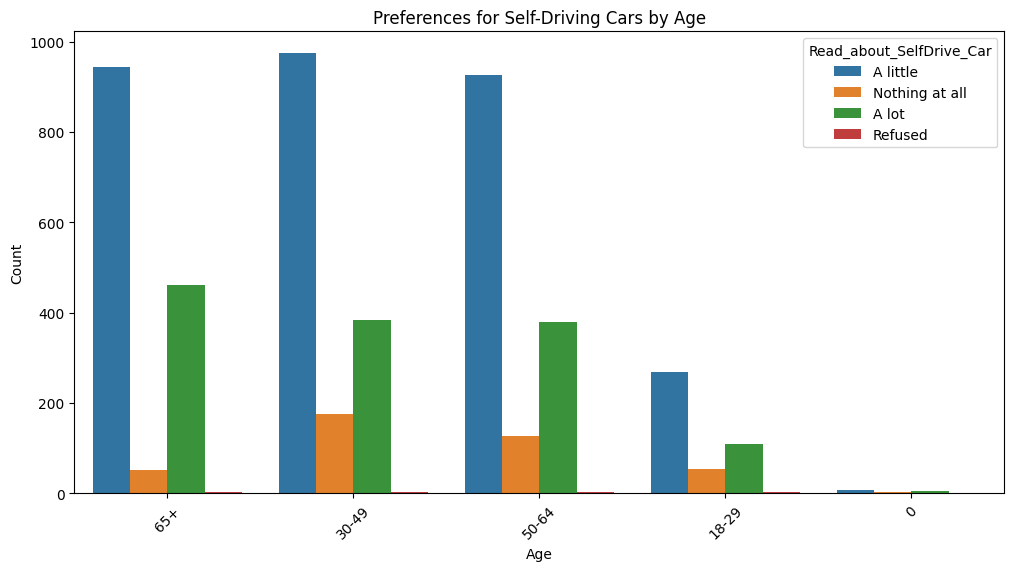

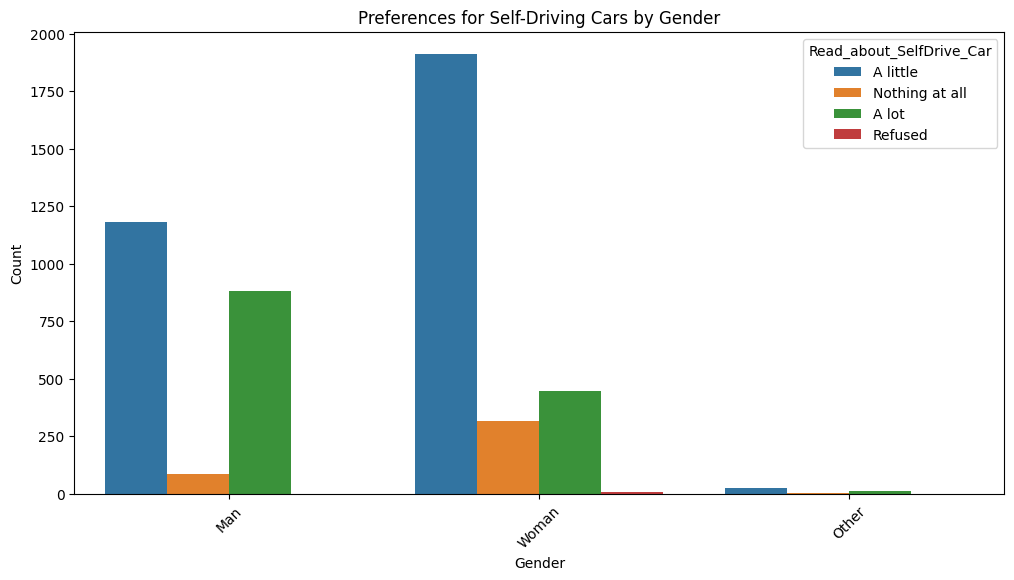

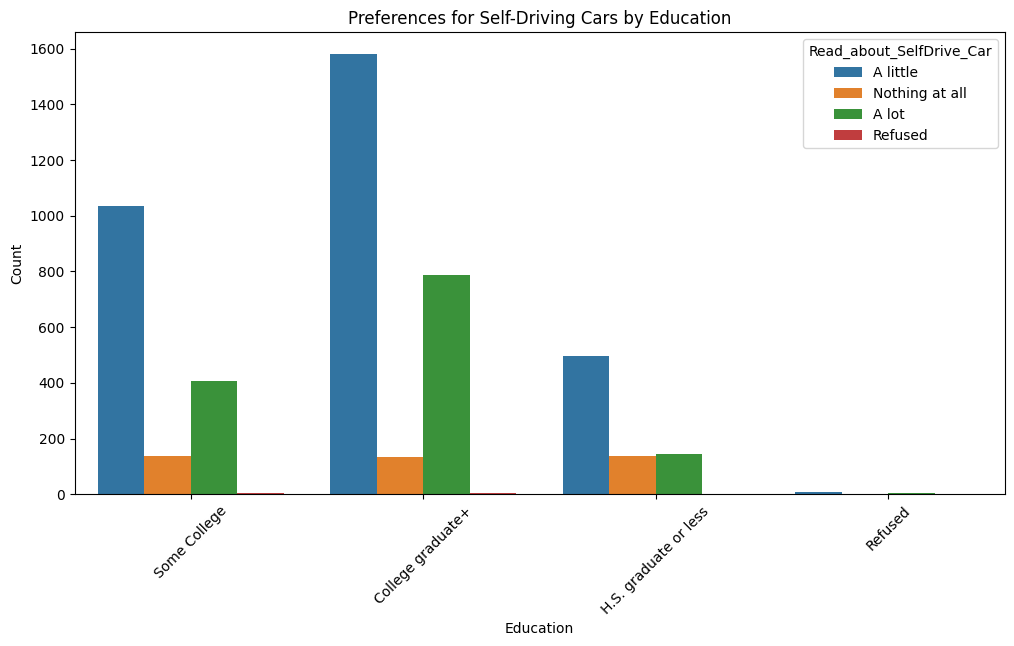

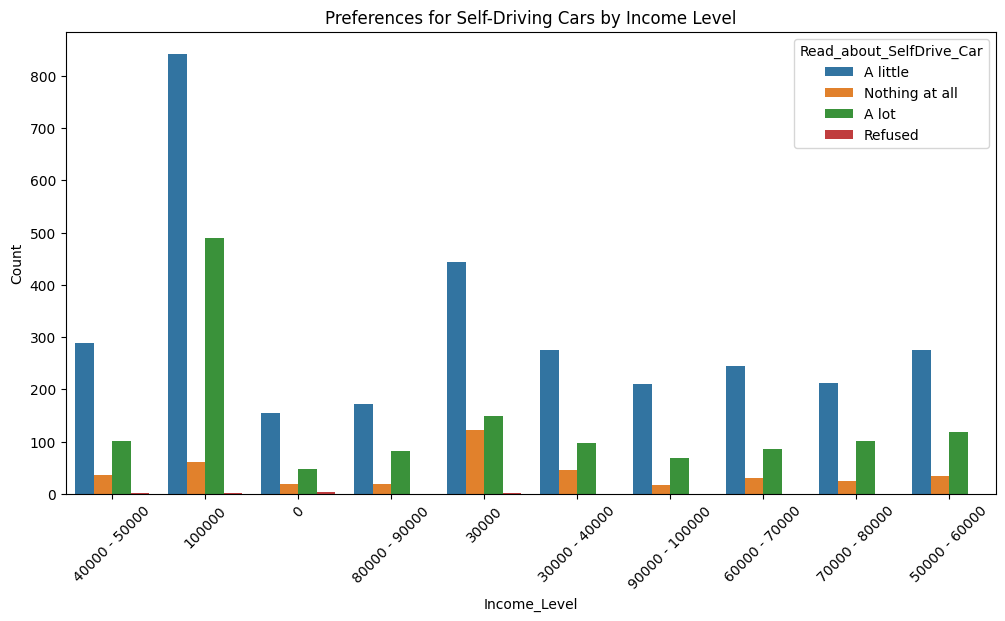

In [24]:
# Create count plots for preferences

plt.figure(figsize=(12, 6))
sns.countplot(x='Age', hue='Read_about_SelfDrive_Car', data=drive_selfcar_df)
plt.title('Preferences for Self-Driving Cars by Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Gender', hue='Read_about_SelfDrive_Car', data=drive_selfcar_df)
plt.title('Preferences for Self-Driving Cars by Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Education', hue='Read_about_SelfDrive_Car', data=drive_selfcar_df)
plt.title('Preferences for Self-Driving Cars by Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Income_Level', hue='Read_about_SelfDrive_Car', data=drive_selfcar_df)
plt.title('Preferences for Self-Driving Cars by Income Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


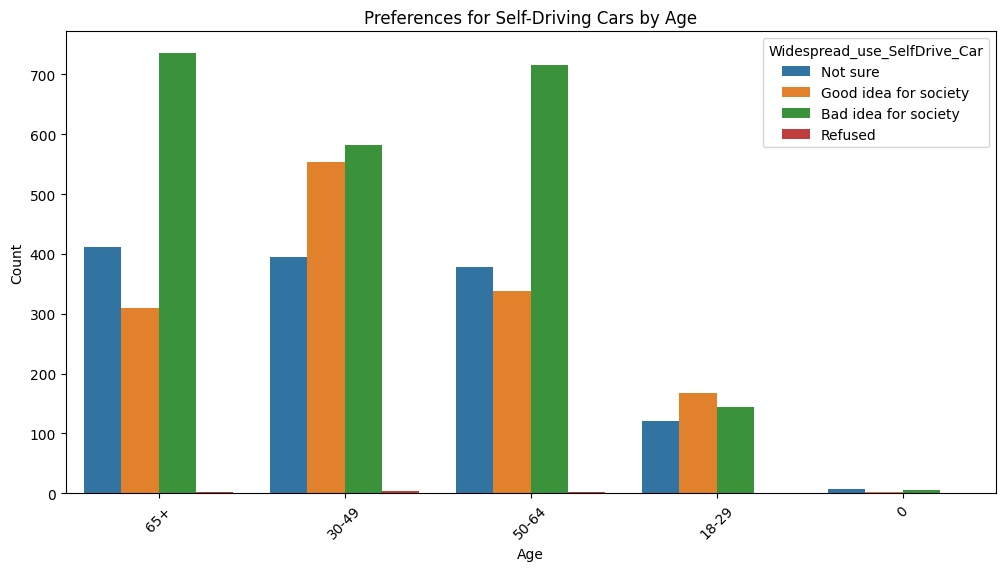

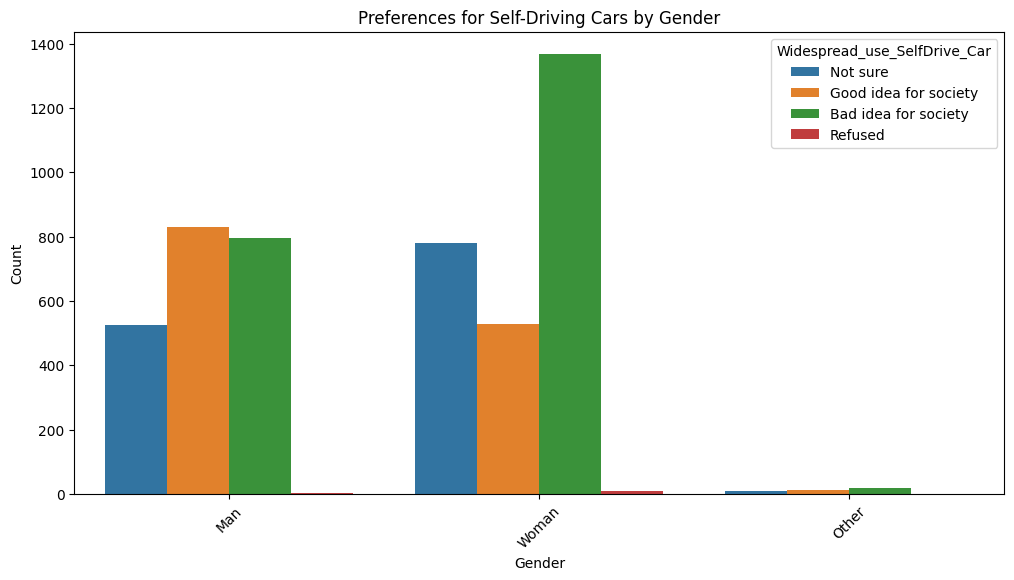

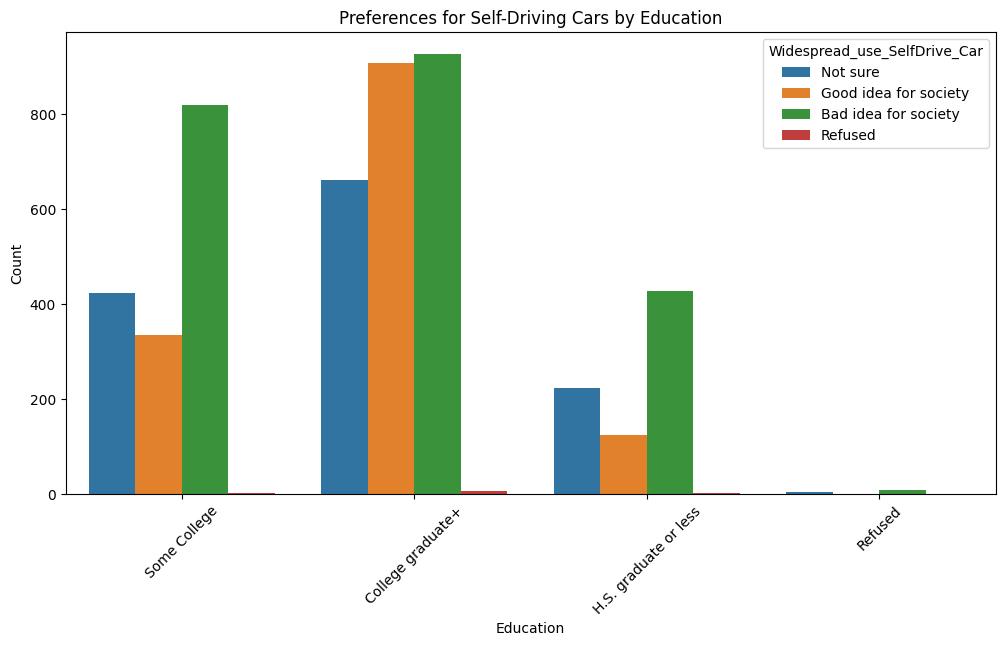

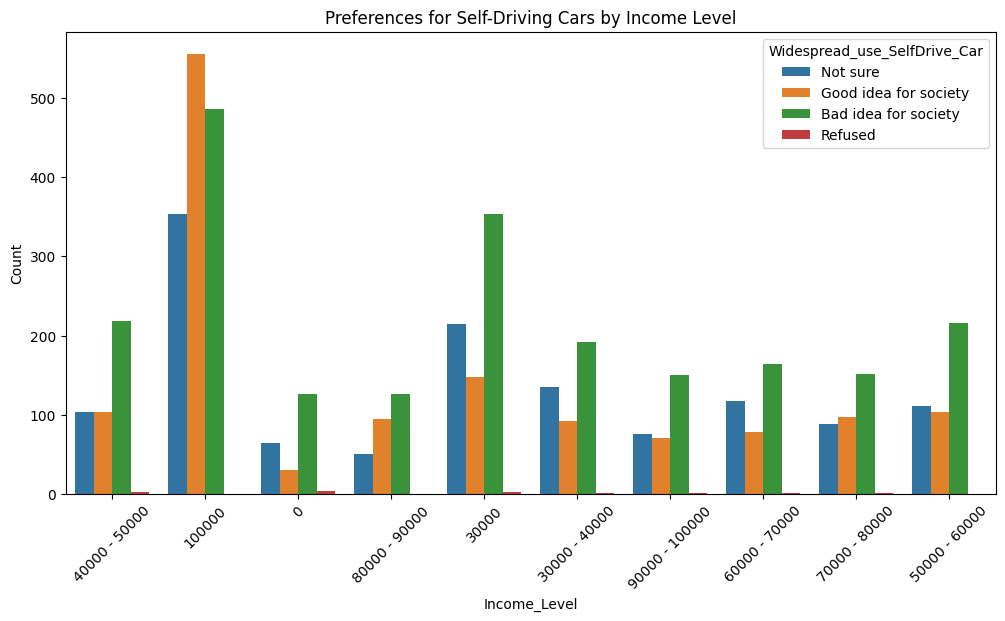

In [25]:
# Create count plots for preferences

plt.figure(figsize=(12, 6))
sns.countplot(x='Age', hue='Widespread_use_SelfDrive_Car', data=drive_selfcar_df)
plt.title('Preferences for Self-Driving Cars by Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Gender', hue='Widespread_use_SelfDrive_Car', data=drive_selfcar_df)
plt.title('Preferences for Self-Driving Cars by Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Education', hue='Widespread_use_SelfDrive_Car', data=drive_selfcar_df)
plt.title('Preferences for Self-Driving Cars by Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Income_Level', hue='Widespread_use_SelfDrive_Car', data=drive_selfcar_df)
plt.title('Preferences for Self-Driving Cars by Income Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

